In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# import utils

### Load Dataset

In [ ]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

white_df = pd.read_csv(URL, sep=';')
white_df['is_red'] = 0
white_df = white_df.drop_duplicates(keep='first')

In [ ]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


### Pre-process the red wine dataset (TODO)

In [ ]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

red_df = pd.read_csv(URL, sep=";")
red_df["is_red"] = 1
red_df = red_df.drop_duplicates(keep='first')
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


In [ ]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
#df = df.iloc[np.random.permutation(len(df))]


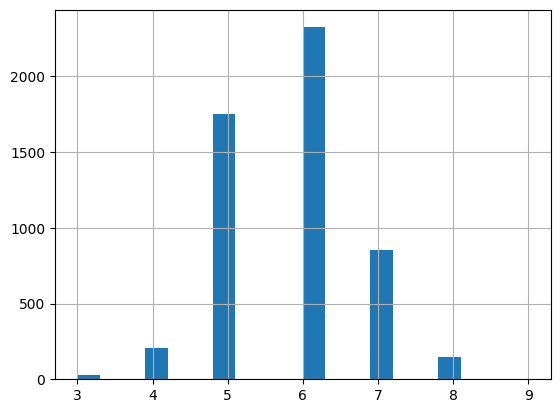

In [ ]:
df['quality'].hist(bins=20);

In [ ]:
df = df[(df['quality']>4) & (df['quality']<8)]
df = df.reset_index(drop=True)

In [ ]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


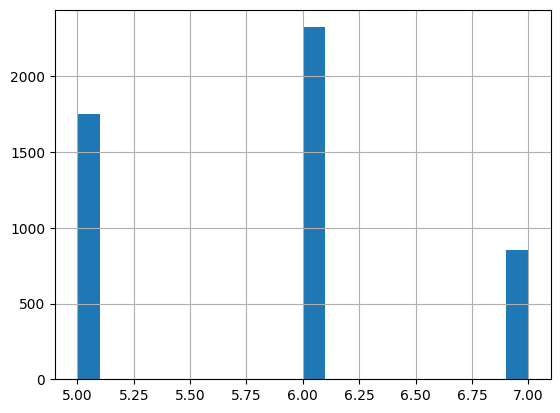

In [ ]:
df['quality'].hist(bins=20);

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [ ]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [ ]:
def format_output(data):
  is_red = data.pop('is_red')
  is_red = np.array(is_red)
  quality = data.pop('quality')
  quality = np.array(quality)
  return (quality, is_red)

In [ ]:
train_Y = format_output(train)
val_Y = format_output(val)
test_Y = format_output(test)

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


### Normalize the data (TODO)

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
norm_train_X = norm(train)
norm_val_X = norm(val)
norm_test_X = norm(test)

### Define the Model

In [ ]:
def base_model(inputs):

  x = tf.keras.layers.Dense(128, activation='relu')(inputs)
  x = tf.keras.layers.Dense(128, activation='relu')(x)

  return x

In [ ]:
def final_model(inputs):
  x = base_model(inputs)
  wine_quality = Dense(units='1', name='wine_quality')(x)
  wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)
  model = Model(inputs=inputs, outputs=[wine_quality, wine_type])
  return model

### Compiling the Model

In [ ]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms,
              loss={'wine_type' : 'binary_crossentropy',
                    'wine_quality' : 'mean_squared_error'},
              metrics={'wine_type' : 'accuracy',
                       'wine_quality' : tf.keras.metrics.RootMeanSquaredError()}
              )

### Training the Model

In [ ]:
history = model.fit(norm_train_X, train_Y, epochs=180, validation_data=(norm_val_X, val_Y))